# Investigating overall section GPA trends across time. Comparing 2006-2007 and 2016-2017

This notebook uses data from the UW Madison database to complete a hypothesis test comparing mean section grades in 2016-2017 to that of 2006-2007.

$H_0$: The grading in 2016-2017 is the same as in 2006-2007

$H_A$: The grading in 2016-2017 is different than in 2006-2007

## Import necessary Python libraries and modules

In [1]:
from sqlalchemy import create_engine
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

## Query the database and create a dataframe of '07 and '17 section mean grades. Select data from Fall and Spring Terms for each year.

In [2]:
engine = create_engine('postgresql:///uw_madison')
df = pd.read_sql_query("""SELECT * FROM section_grades_term;""", engine)

oh_six_oh_seven = df.loc[df['term_code'].isin(['1072', '1074'])]
sixteen_seventeen = df.loc[df['term_code'].isin(['1172', '1174'])]

## Randomly sample from the 2016-2017 to create equal-sized data sets for evaluation.

In [3]:
oh_six_oh_seven_dist = oh_six_oh_seven['section_gpa']
sixteen_seventeen_dist = np.random.choice(sixteen_seventeen['section_gpa'], 
                                          size=len(oh_six_oh_seven_dist),
                                          replace=False)


# Visualize data sets

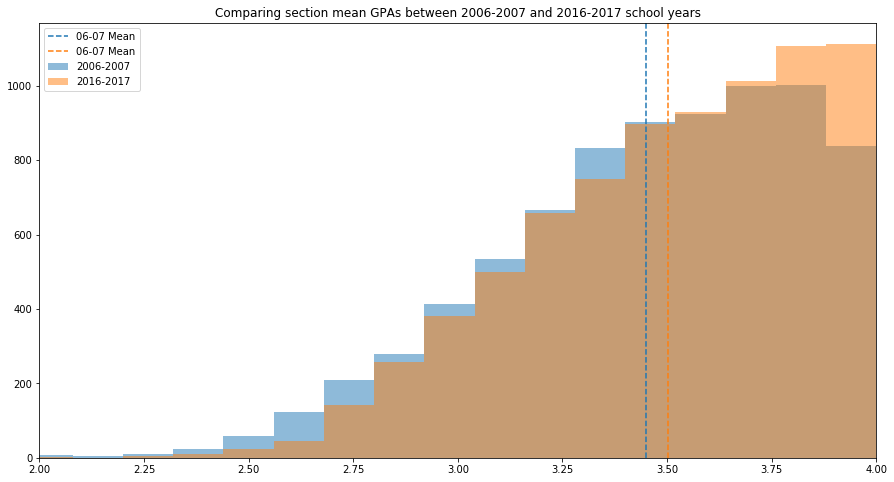

In [4]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.hist(oh_six_oh_seven_dist, alpha = .5, label='2006-2007', 
        range=(1, 4), bins=25)
ax.hist(sixteen_seventeen_dist, alpha = .5, label='2016-2017', 
        range= (1, 4), bins=25)
ax.axvline(oh_six_oh_seven_dist.mean(), color='#1f77b4', linestyle='dashed', label='06-07 Mean')
ax.axvline(sixteen_seventeen_dist.mean(), color='#ff7f0e', linestyle='dashed', label='06-07 Mean')
ax.legend()
ax.set_title('Comparing section mean GPAs between 2006-2007 and 2016-2017 school years')
ax.set_xlim(2,4);

# Complete t-test and print results

In [5]:
statistics = stats.ttest_ind(oh_six_oh_seven_dist, sixteen_seventeen_dist)
print(f'T-Statistic: {round(statistics[0],2)} \np-value: {round(statistics[1],2)}')

T-Statistic: -9.58 
p-value: 0.0


# Analysis

We reject the null hypothesis that there is no difference between 2006-2007 and 2016-2017 with a confidence interval of 95%.